In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate depth averages over vertical intervals


In [2]:
def vertical_int_avg(depth, density, intervals):
    
    # Initialize average depth and density arrays
    avg_depth = np.zeros(len(intervals) -1); avg_depth[:] = np.nan
    avg_density = np.zeros(len(intervals) -1); avg_density[:] = np.nan
    
    # Loop over each interval 
    for j in range(0, len(intervals) -1):
        
        # Define low and high depth for each interval, then write filter function
        # which grabs values between this defined low and high
        depth_low = intervals[j]
        depth_high = intervals[j+1]
        filter_func = np.vectorize(lambda depth: depth >= depth_low and depth <= depth_high)
        
        # Determine depth and density data in interval
        tmp_depth = depth[filter_func(depth)]
        tmp_density = density[filter_func(depth)]
        
        # Initialize layer thickness array
        thickness = np.zeros(len(tmp_density)); thickness[:] = np.nan
        
        # Calculate interval avergage depth and density                     
        if len(thickness) == 0: # No data in interval 
            avg_depth[j] = np.nan
            avg_density[j] = np.nan
        elif len(thickness) == 1: # Only one data point in interval
            avg_depth[j] = tmp_depth[0]
            avg_density[j] = tmp_density[0]
        else: # There are 2 or more data points in interval
            for k in range(0, len(tmp_depth)):
                if k == 0:
                    thickness[k] = (tmp_depth[k] + tmp_depth[k+1]) / 2 - depth_low
                elif k == len(tmp_depth) - 1:
                    thickness[k] = depth_high - (tmp_depth[k] + tmp_depth[k-1]) / 2
                else: 
                    thickness[k] = ((tmp_depth[k+1] + tmp_depth[k]) / 2) - ((tmp_depth[k] + tmp_depth[k]) / 2)
            avg_density[j] = np.nansum(tmp_density * thickness / np.nansum(thickness))  
            avg_depth[j] = np.nansum(tmp_depth * thickness / np.nansum(thickness))
        
    return avg_depth, avg_density

# Function to get averaged density data

In [3]:
def get_data(pro_path, tgt_date, intervals):
    !bash postprocess.sh {pro_path} {tgt_time} > pro_data.txt
    depth, density = np.loadtxt("pro_data.txt", usecols=(2, 5), unpack=True)
    depth, density = vertical_int_avg(depth, density, intervals)
    return depth, density

# Settings

In [4]:
low = 0; high = 10; step = 1 # 1 meter resolution - consistent with other plots. 
intervals = np.arange(low, high + step, step)
tgt_time = "2017-12-31"
# tgt_time = "1980-01-03"
max_depth = 10
depth_plot = np.arange(step/2, max_depth + step/2, step)

# SP

##### Define paths

In [5]:
base_path = "/pl/active/nasa_smb/simulations/up_to_date_simulations/SNOWPACK_ensemble/"
SP_base_pro_path = base_path + "SP/output/SP.pro"
SP_low_pro_path = base_path + "SP_low/output/SP.pro"
SP_high_pro_path = base_path + "SP_high/output/SP.pro"
SP_cold_pro_path = base_path + "SP_cold/output/SP.pro"
SP_warm_pro_path = base_path + "SP_warm/output/SP.pro"
SP_more_wind_pro_path = base_path + "SP_more_wind/output/SP.pro"
SP_less_wind_pro_path = base_path + "SP_less_wind/output/SP.pro"

##### Get data

In [6]:
# Base 
SP_base_depth, SP_base_density = get_data(SP_base_pro_path, tgt_time, intervals)
# Low
SP_low_depth, SP_low_density = get_data(SP_low_pro_path, tgt_time, intervals)
# High
SP_high_depth, SP_high_density = get_data(SP_high_pro_path, tgt_time, intervals)
# Cold
SP_cold_depth, SP_cold_density = get_data(SP_cold_pro_path, tgt_time, intervals)
# Warm
SP_warm_depth, SP_warm_density = get_data(SP_warm_pro_path, tgt_time, intervals)
# More wind
SP_more_wind_depth, SP_more_wind_density = get_data(SP_more_wind_pro_path, tgt_time, intervals)
# Less wind
SP_less_wind_depth, SP_less_wind_density = get_data(SP_less_wind_pro_path, tgt_time, intervals)

# WAIS

##### Define paths

In [7]:
base_path = "/pl/active/nasa_smb/simulations/up_to_date_simulations/SNOWPACK_ensemble/"
WAIS_base_pro_path = base_path + "WAIS/output/WAIS.pro"
WAIS_low_pro_path = base_path + "WAIS_low/output/WAIS.pro"
WAIS_high_pro_path = base_path + "WAIS_high/output/WAIS.pro"
WAIS_cold_pro_path = base_path + "WAIS_cold/output/WAIS.pro"
WAIS_warm_pro_path = base_path + "WAIS_warm/output/WAIS.pro"
WAIS_more_wind_pro_path = base_path + "WAIS_more_wind/output/WAIS.pro"
WAIS_less_wind_pro_path = base_path + "WAIS_less_wind/output/WAIS.pro"

##### Get data

In [8]:
# Base 
WAIS_base_depth, WAIS_base_density = get_data(WAIS_base_pro_path, tgt_time, intervals)
# Low
WAIS_low_depth, WAIS_low_density = get_data(WAIS_low_pro_path, tgt_time, intervals)
# High
WAIS_high_depth, WAIS_high_density = get_data(WAIS_high_pro_path, tgt_time, intervals)
# Cold
WAIS_cold_depth, WAIS_cold_density = get_data(WAIS_cold_pro_path, tgt_time, intervals)
# Warm
WAIS_warm_depth, WAIS_warm_density = get_data(WAIS_warm_pro_path, tgt_time, intervals)
# More wind
WAIS_more_wind_depth, WAIS_more_wind_density = get_data(WAIS_more_wind_pro_path, tgt_time, intervals)
# Less wind
WAIS_less_wind_depth, WAIS_less_wind_density = get_data(WAIS_less_wind_pro_path, tgt_time, intervals)

# Plot simulated density profiles

Date: 2017-12-31


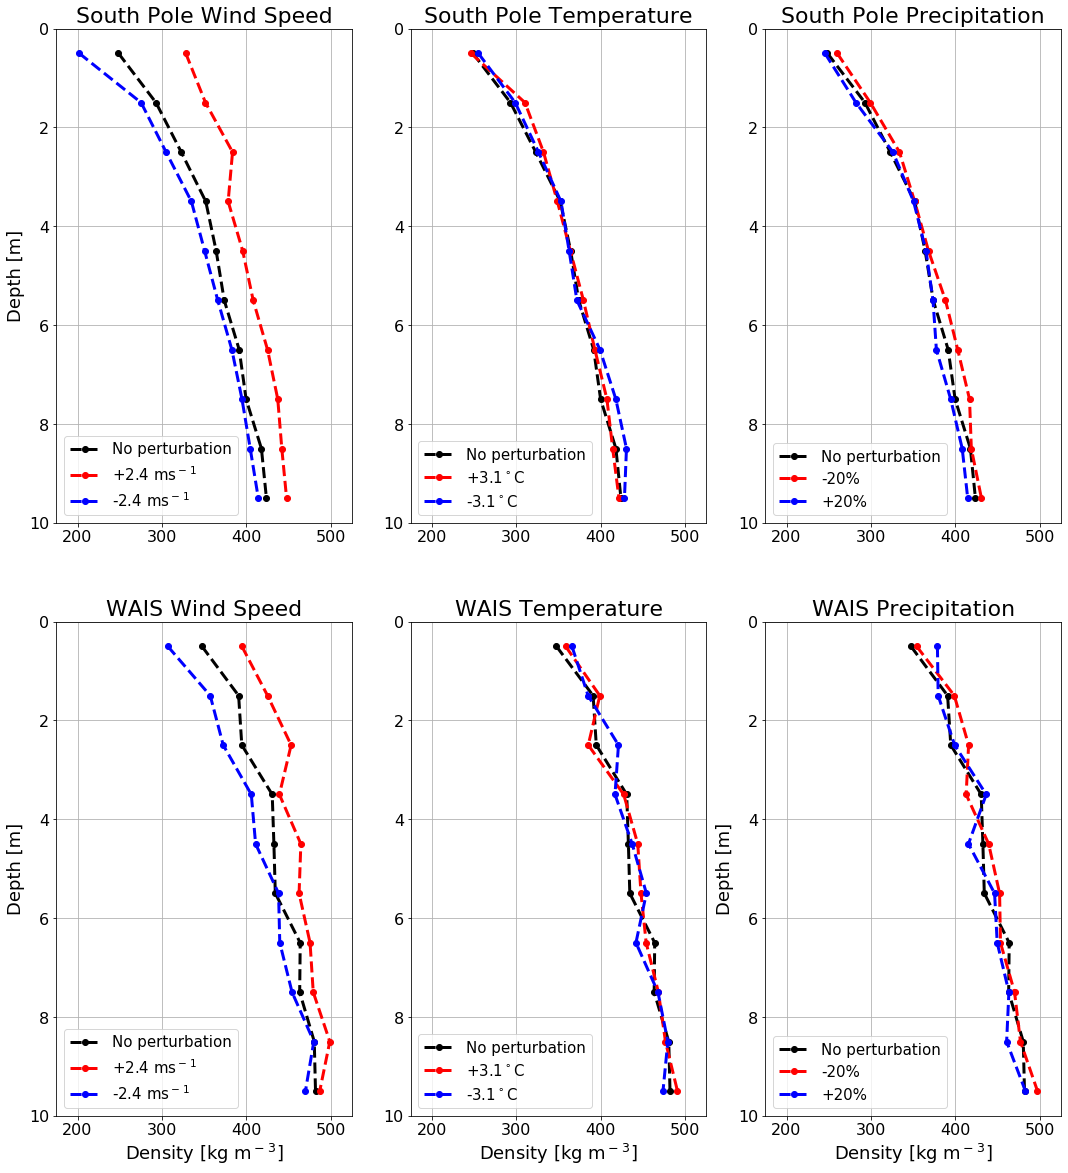

In [25]:
fig1, axs = plt.subplots(2, 3, figsize=(18,20))
lw = 3
legend_fs = 15
domain = [175, 525]

## South Pole
# Accumulation Ensemble
axs[0, 2].plot(SP_base_density, depth_plot, 'ko--', label='No perturbation', linewidth=lw)
axs[0, 2].plot(SP_low_density, depth_plot, 'ro--', label='-20%', linewidth=lw)
axs[0, 2].plot(SP_high_density, depth_plot, 'bo--', label='+20%', linewidth=lw)
axs[0, 2].set_ylim([0, max_depth])
axs[0, 2].set_xlim(domain)
axs[0, 2].invert_yaxis()
axs[0, 2].grid()
axs[0, 2].legend(fontsize = legend_fs, loc='lower left')
# axs[0, 0].set_xlabel("Density [kg m$^-$$^3$]", fontsize=18)
axs[0, 2].tick_params(axis="x", labelsize=16)
axs[0, 2].tick_params(axis="y", labelsize=16)
axs[0, 2].set_title("South Pole Precipitation", fontsize=22)

# Temperature Ensemble
axs[0, 1].plot(SP_base_density, depth_plot, 'ko--', label='No perturbation', linewidth=lw)
axs[0, 1].plot(SP_warm_density, depth_plot, 'ro--', label='+3.1$^\circ$C', linewidth=lw)
axs[0, 1].plot(SP_cold_density, depth_plot, 'bo--', label='-3.1$^\circ$C', linewidth=lw)
axs[0, 1].set_ylim([0, max_depth])
axs[0, 1].set_xlim(domain)
axs[0, 1].invert_yaxis()
axs[0, 1].grid()
axs[0, 1].legend(fontsize = legend_fs, loc='lower left')
# axs[0, 1].set_xlabel("Density [kg m$^-$$^3$]", fontsize=18)
axs[0, 1].tick_params(axis="x", labelsize=16)
axs[0, 1].tick_params(axis="y", labelsize=16)
axs[0, 1].set_title("South Pole Temperature", fontsize=22)

# Wind Ensemble
axs[0, 0].plot(SP_base_density, depth_plot, 'ko--', label='No perturbation', linewidth=lw)
axs[0, 0].plot(SP_more_wind_density, depth_plot, 'ro--', label='+2.4 ms$^-$$^1$', linewidth=lw)
axs[0, 0].plot(SP_less_wind_density, depth_plot, 'bo--', label='-2.4 ms$^-$$^1$', linewidth=lw)
axs[0, 0].set_ylim([0, max_depth])
axs[0, 0].set_xlim(domain)
axs[0, 0].invert_yaxis()
axs[0, 0].grid()
axs[0, 0].legend(fontsize = legend_fs, loc='lower left')
# axs[0, 1].set_xlabel("Density [kg m$^-$$^3$]", fontsize=18)
axs[0, 0].tick_params(axis="x", labelsize=16)
axs[0, 0].tick_params(axis="y", labelsize=16)
axs[0, 0].set_title("South Pole Wind Speed", fontsize=22)
axs[0, 0].set_ylabel("Depth [m]", fontsize=18)

## WAIS
# Accumulation Ensemble
axs[1, 2].plot(WAIS_base_density, depth_plot, 'ko--', label='No perturbation', linewidth=lw)
axs[1, 2].plot(WAIS_low_density, depth_plot, 'ro--', label='-20%', linewidth=lw)
axs[1, 2].plot(WAIS_high_density, depth_plot, 'bo--', label='+20%', linewidth=lw)
axs[1, 2].set_ylim([0, max_depth])
axs[1, 2].set_xlim(domain)
axs[1, 2].invert_yaxis()
axs[1, 2].grid()
axs[1, 2].legend(fontsize = legend_fs, loc='lower left')
axs[1, 2].set_ylabel("Depth [m]", fontsize=18)
axs[1, 2].set_xlabel("Density [kg m$^-$$^3$]", fontsize=18)
axs[1, 2].tick_params(axis="x", labelsize=16)
axs[1, 2].tick_params(axis="y", labelsize=16)
axs[1, 2].set_title("WAIS Precipitation", fontsize=22)

# Temperature Ensemble
axs[1, 1].plot(WAIS_base_density, depth_plot, 'ko--', label='No perturbation', linewidth=lw)
axs[1, 1].plot(WAIS_warm_density, depth_plot, 'ro--', label='+3.1$^\circ$C', linewidth=lw)
axs[1, 1].plot(WAIS_cold_density, depth_plot, 'bo--', label='-3.1$^\circ$C', linewidth=lw)
axs[1, 1].set_ylim([0, max_depth])
axs[1, 1].set_xlim(domain)
axs[1, 1].invert_yaxis()
axs[1, 1].grid()
axs[1, 1].legend(fontsize = legend_fs, loc='lower left')
axs[1, 1].set_xlabel("Density [kg m$^-$$^3$]", fontsize=18)
axs[1, 1].tick_params(axis="x", labelsize=16)
axs[1, 1].tick_params(axis="y", labelsize=16)
axs[1, 1].set_title("WAIS Temperature", fontsize=22)

# Wind Ensemble
axs[1, 0].plot(WAIS_base_density, depth_plot, 'ko--', label='No perturbation', linewidth=lw)
axs[1, 0].plot(WAIS_more_wind_density, depth_plot, 'ro--', label='+2.4 ms$^-$$^1$', linewidth=lw)
axs[1, 0].plot(WAIS_less_wind_density, depth_plot, 'bo--', label='-2.4 ms$^-$$^1$', linewidth=lw)
axs[1, 0].set_ylim([0, max_depth])
axs[1, 0].set_xlim(domain)
axs[1, 0].invert_yaxis()
axs[1, 0].grid()
axs[1, 0].legend(fontsize = legend_fs, loc='lower left')
axs[1, 0].set_xlabel("Density [kg m$^-$$^3$]", fontsize=18)
axs[1, 0].tick_params(axis="x", labelsize=16)
axs[1, 0].tick_params(axis="y", labelsize=16)
axs[1, 0].set_title("WAIS Wind Speed", fontsize=22)
axs[1, 0].set_ylabel("Depth [m]", fontsize=18)

# Save Figure
plt.savefig("Figures/SNOWPACK_ensemble.pdf", format='pdf', dpi=100)
print("Date: " + str(tgt_time))

# Plot perturbed density profile differences

Date: 2017-12-31


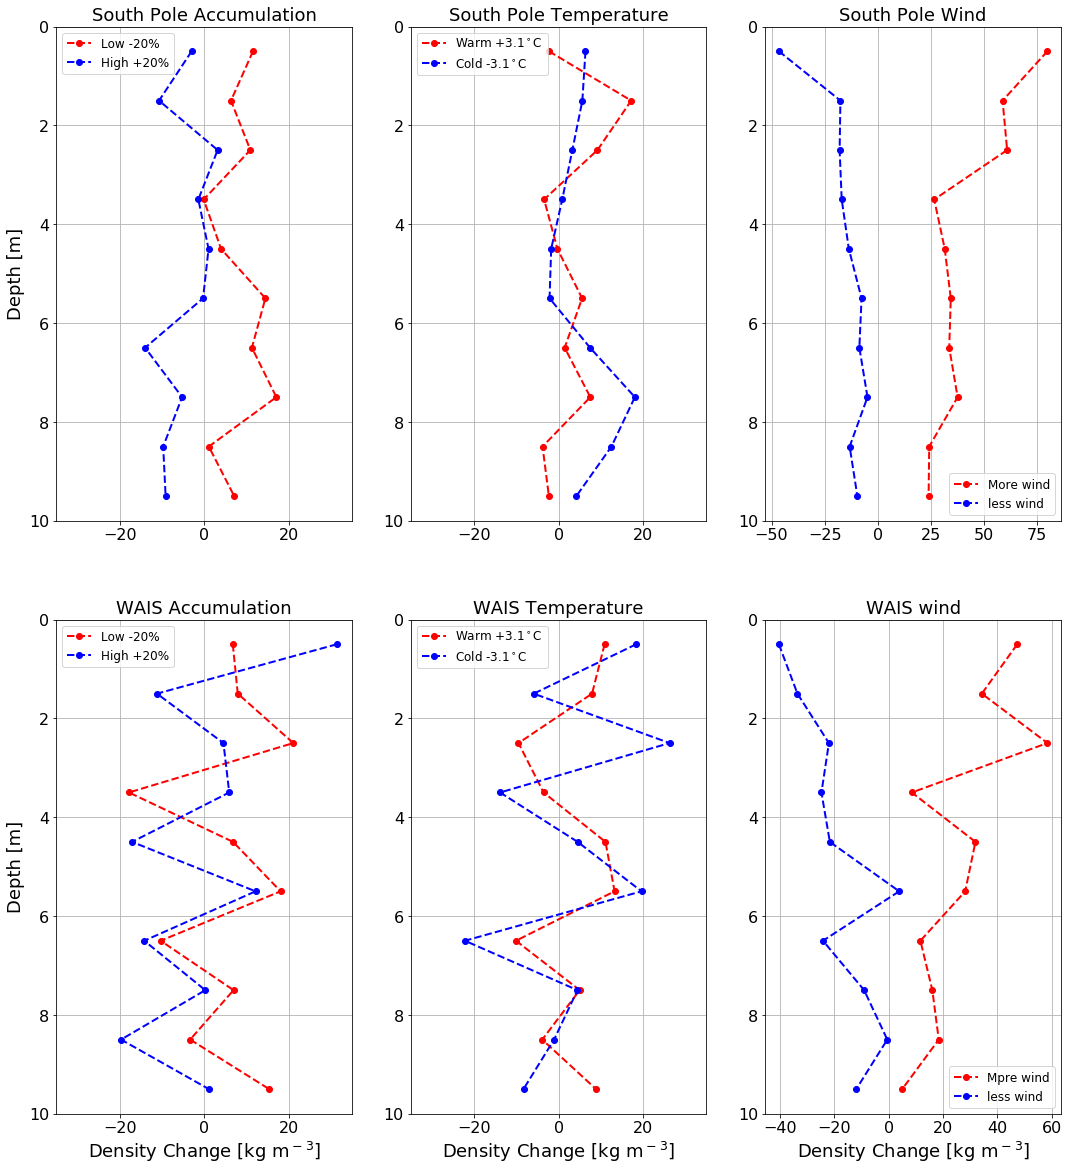

In [17]:
fig1, axs = plt.subplots(2, 3, figsize=(18,20))

## South Pole
# Accumulation Ensemble
axs[0, 0].plot(SP_low_density - SP_base_density, depth_plot, 'ro--', label='Low -20%', linewidth=2)
axs[0, 0].plot(SP_high_density - SP_base_density, depth_plot, 'bo--', label='High +20%', linewidth=2)
axs[0, 0].set_ylim([0, max_depth])
axs[0, 0].set_xlim([-35, 35])
axs[0, 0].invert_yaxis()
axs[0, 0].grid()
axs[0, 0].legend(fontsize = 12)
axs[0, 0].set_ylabel("Depth [m]", fontsize=18)
axs[0, 0].tick_params(axis="x", labelsize=16)
axs[0, 0].tick_params(axis="y", labelsize=16)
axs[0, 0].set_title("South Pole Accumulation", fontsize=18)

# Temperature Ensemble
axs[0, 1].plot(SP_warm_density - SP_base_density, depth_plot, 'ro--', label='Warm +3.1$^\circ$C', linewidth=2)
axs[0, 1].plot(SP_cold_density - SP_base_density, depth_plot, 'bo--', label='Cold -3.1$^\circ$C', linewidth=2)
axs[0, 1].set_ylim([0, max_depth])
axs[0, 1].set_xlim([-35, 35])
axs[0, 1].invert_yaxis()
axs[0, 1].grid()
axs[0, 1].legend(fontsize = 12)
axs[0, 1].tick_params(axis="x", labelsize=16)
axs[0, 1].tick_params(axis="y", labelsize=16)
axs[0, 1].set_title("South Pole Temperature", fontsize=18)

# Wind  ensemble
axs[0, 2].plot(SP_more_wind_density - SP_base_density, depth_plot, 'ro--', label='More wind', linewidth=2)
axs[0, 2].plot(SP_less_wind_density - SP_base_density, depth_plot, 'bo--', label='less wind', linewidth=2)
axs[0, 2].set_ylim([0, max_depth])
# axs[0, 2].set_xlim([-35, 35])
axs[0, 2].invert_yaxis()
axs[0, 2].grid()
axs[0, 2].legend(fontsize = 12)
axs[0, 2].tick_params(axis="x", labelsize=16)
axs[0, 2].tick_params(axis="y", labelsize=16)
axs[0, 2].set_title("South Pole Wind", fontsize=18)

## WAIS
# Accumulation Ensemble
axs[1, 0].plot(WAIS_low_density - WAIS_base_density, depth_plot, 'ro--', label='Low -20%', linewidth=2)
axs[1, 0].plot(WAIS_high_density - WAIS_base_density, depth_plot, 'bo--', label='High +20%', linewidth=2)
axs[1, 0].set_ylim([0, max_depth])
axs[1, 0].set_xlim([-35, 35])
axs[1, 0].invert_yaxis()
axs[1, 0].grid()
axs[1, 0].legend(fontsize = 12)
axs[1, 0].set_ylabel("Depth [m]", fontsize=18)
axs[1, 0].set_xlabel("Density Change [kg m$^-$$^3$]", fontsize=18)
axs[1, 0].tick_params(axis="x", labelsize=16)
axs[1, 0].tick_params(axis="y", labelsize=16)
axs[1, 0].set_title("WAIS Accumulation", fontsize=18)

# Temperature Ensemble
axs[1, 1].plot(WAIS_warm_density - WAIS_base_density, depth_plot, 'ro--', label='Warm +3.1$^\circ$C', linewidth=2)
axs[1, 1].plot(WAIS_cold_density - WAIS_base_density, depth_plot, 'bo--', label='Cold -3.1$^\circ$C', linewidth=2)
axs[1, 1].set_ylim([0, max_depth])
axs[1, 1].set_xlim([-35, 35])
axs[1, 1].invert_yaxis()
axs[1, 1].grid()
axs[1, 1].legend(fontsize = 12)
axs[1, 1].set_xlabel("Density Change [kg m$^-$$^3$]", fontsize=18)
axs[1, 1].tick_params(axis="x", labelsize=16)
axs[1, 1].tick_params(axis="y", labelsize=16)
axs[1, 1].set_title("WAIS Temperature", fontsize=18)

# Wind Ensemble
axs[1, 2].plot(WAIS_more_wind_density - WAIS_base_density, depth_plot, 'ro--', label='Mpre wind', linewidth=2)
axs[1, 2].plot(WAIS_less_wind_density - WAIS_base_density, depth_plot, 'bo--', label='less wind', linewidth=2)
axs[1, 2].set_ylim([0, max_depth])
# axs[1, 2].set_xlim([-35, 35])
axs[1, 2].invert_yaxis()
axs[1, 2].grid()
axs[1, 2].legend(fontsize = 12)
axs[1, 2].set_xlabel("Density Change [kg m$^-$$^3$]", fontsize=18)
axs[1, 2].tick_params(axis="x", labelsize=16)
axs[1, 2].tick_params(axis="y", labelsize=16)
axs[1, 2].set_title("WAIS wind", fontsize=18)

# # Save Figure
plt.savefig("Figures/SNOWPACK_ensemble_perturbation.pdf", format='pdf', dpi=100)
print("Date: " + str(tgt_time))


In [27]:
WAIS_more_wind_density - WAIS_base_density

array([47.33907416, 34.28831652, 58.45204726,  8.50857396, 31.93734403,
       28.16944137, 11.66685979, 16.06564304, 18.42606386,  5.0085541 ])

In [28]:
WAIS_less_wind_density - WAIS_base_density

array([-40.4626474 , -33.62265941, -22.02855852, -24.77909508,
       -21.68584654,   3.86446729, -24.21642581,  -9.05530192,
        -0.52972124, -11.92093061])

In [29]:
SP_more_wind_density - SP_base_density

array([79.75447315, 58.66494477, 60.811781  , 26.51098893, 31.46134197,
       34.30191718, 33.57314816, 37.51521782, 24.16113403, 23.86969351])

In [30]:
SP_less_wind_density - SP_base_density

array([-46.56049113, -17.61129126, -17.97911229, -17.00719155,
       -13.64967973,  -7.67237749,  -8.69880389,  -4.87762675,
       -13.25808943,  -9.6477271 ])

# Plot perturbed density profile percent differences

Date: 2017-12-31


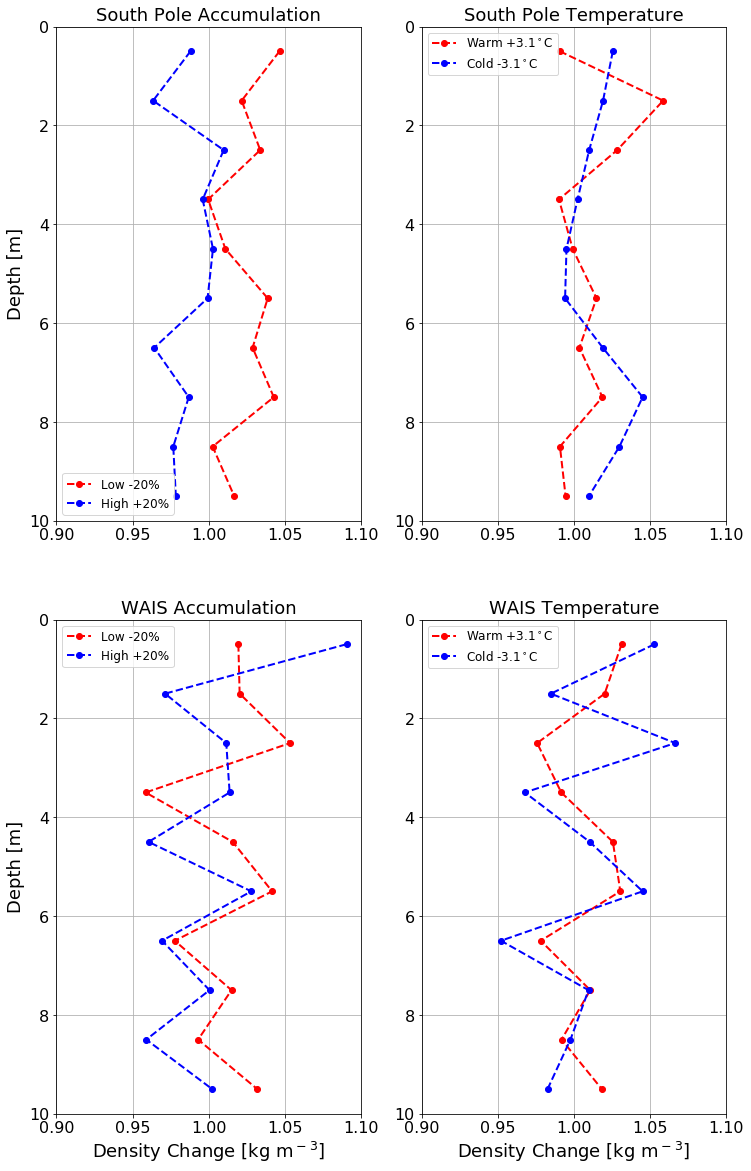

In [12]:
fig1, axs = plt.subplots(2, 2, figsize=(12,20))

## South Pole
# Accumulation Ensemble
axs[0, 0].plot(SP_low_density / SP_base_density, depth_plot, 'ro--', label='Low -20%', linewidth=2)
axs[0, 0].plot(SP_high_density / SP_base_density, depth_plot, 'bo--', label='High +20%', linewidth=2)
axs[0, 0].set_ylim([0, max_depth])
axs[0, 0].set_xlim([0.9, 1.1])
axs[0, 0].invert_yaxis()
axs[0, 0].grid()
axs[0, 0].legend(fontsize = 12)
axs[0, 0].set_ylabel("Depth [m]", fontsize=18)
axs[0, 0].tick_params(axis="x", labelsize=16)
axs[0, 0].tick_params(axis="y", labelsize=16)
axs[0, 0].set_title("South Pole Accumulation", fontsize=18)

# Temperature Ensemble
axs[0, 1].plot(SP_warm_density / SP_base_density, depth_plot, 'ro--', label='Warm +3.1$^\circ$C', linewidth=2)
axs[0, 1].plot(SP_cold_density / SP_base_density, depth_plot, 'bo--', label='Cold -3.1$^\circ$C', linewidth=2)
axs[0, 1].set_ylim([0, max_depth])
axs[0, 1].set_xlim([0.9, 1.1])
axs[0, 1].invert_yaxis()
axs[0, 1].grid()
axs[0, 1].legend(fontsize = 12)
axs[0, 1].tick_params(axis="x", labelsize=16)
axs[0, 1].tick_params(axis="y", labelsize=16)
axs[0, 1].set_title("South Pole Temperature", fontsize=18)

## WAIS
# Accumulation Ensemble
axs[1, 0].plot(WAIS_low_density / WAIS_base_density, depth_plot, 'ro--', label='Low -20%', linewidth=2)
axs[1, 0].plot(WAIS_high_density / WAIS_base_density, depth_plot, 'bo--', label='High +20%', linewidth=2)
axs[1, 0].set_ylim([0, max_depth])
axs[1, 0].set_xlim([0.9, 1.1])
axs[1, 0].invert_yaxis()
axs[1, 0].grid()
axs[1, 0].legend(fontsize = 12)
axs[1, 0].set_ylabel("Depth [m]", fontsize=18)
axs[1, 0].set_xlabel("Density Change [kg m$^-$$^3$]", fontsize=18)
axs[1, 0].tick_params(axis="x", labelsize=16)
axs[1, 0].tick_params(axis="y", labelsize=16)
axs[1, 0].set_title("WAIS Accumulation", fontsize=18)

# Temperature Ensemble
axs[1, 1].plot(WAIS_warm_density / WAIS_base_density, depth_plot, 'ro--', label='Warm +3.1$^\circ$C', linewidth=2)
axs[1, 1].plot(WAIS_cold_density / WAIS_base_density, depth_plot, 'bo--', label='Cold -3.1$^\circ$C', linewidth=2)
axs[1, 1].set_ylim([0, max_depth])
axs[1, 1].set_xlim([0.9, 1.1])
axs[1, 1].invert_yaxis()
axs[1, 1].grid()
axs[1, 1].legend(fontsize = 12)
axs[1, 1].set_xlabel("Density Change [kg m$^-$$^3$]", fontsize=18)
axs[1, 1].tick_params(axis="x", labelsize=16)
axs[1, 1].tick_params(axis="y", labelsize=16)
axs[1, 1].set_title("WAIS Temperature", fontsize=18)

# # Save Figure
# plt.savefig("Figures/SNOWPACK_ensemble_perturbation.pdf", format='pdf', dpi=100)
print("Date: " + str(tgt_time))



In [32]:
WAIS_more_wind_density / WAIS_base_density # 5

array([1.13630636, 1.08773038, 1.14813433, 1.01975818, 1.07382109,
       1.06486172, 1.02515475, 1.03468557, 1.03835174, 1.01039256])

In [33]:
WAIS_less_wind_density / WAIS_base_density # 6

array([0.88349337, 0.91397278, 0.94417329, 0.94245923, 0.94987458,
       1.00889815, 0.9477873 , 0.98044969, 0.99889745, 0.97526452])

In [34]:
SP_more_wind_density / SP_base_density # 10

array([1.32107605, 1.20027368, 1.18837014, 1.07533446, 1.08638197,
       1.09176712, 1.08574907, 1.09386033, 1.05782372, 1.05632881])

In [35]:
SP_less_wind_density / SP_base_density # 3

array([0.81255649, 0.93987759, 0.94430803, 0.95167183, 0.9625227 ,
       0.97947427, 0.97778241, 0.98779653, 0.96827003, 0.97723285])